In [ ]:
# CNN(합성곱 신경망)을 이용하여 Fashion MNIST 예측 모델 구현

from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이 값으로 scale 및 float32형 변형
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0~1 사이 값 float32로 변경하는 함수 호출한 뒤 OHE 적용 
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용 
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0~1 사이 값 float32로 변경 및 OHE 적용
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)


# Fashion MNIST 데이터 재로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000,)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 함
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 100)               1081700   
                                                             

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 151s 377ms/step - loss: 0.4391 - accuracy: 0.8431 - val_loss: 0.3167 - val_accuracy: 0.8861
Epoch 2/30
399/399 [==============================] - 145s 363ms/step - loss: 0.2722 - accuracy: 0.9022 - val_loss: 0.2761 - val_accuracy: 0.9034
Epoch 3/30
399/399 [==============================] - 148s 371ms/step - loss: 0.2218 - accuracy: 0.9184 - val_loss: 0.2511 - val_accuracy: 0.9073
Epoch 4/30
399/399 [==============================] - 152s 380ms/step - loss: 0.1860 - accuracy: 0.9313 - val_loss: 0.2751 - val_accuracy: 0.8988
Epoch 5/30
399/399 [==============================] - 145s 365ms/step - loss: 0.1541 - accuracy: 0.9434 - val_loss: 0.2342 - val_accuracy: 0.9164
Epoch 6/30
399/399 [==============================] - 146s 366ms/step - loss: 0.1243 - accuracy: 0.9547 - val_loss: 0.2431 - val_accuracy: 0.9192
Epoch 7/30
399/399 [==============================] - 144s 361ms/step - loss: 0.1026 - accuracy: 0.9617 - val_loss: 0.2454 -

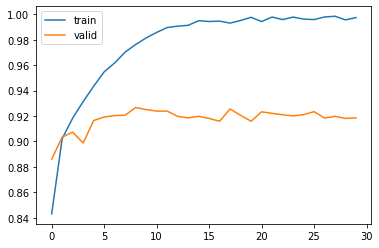

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 6s 157ms/step - loss: 0.6337 - accuracy: 0.9211


[0.6337308883666992, 0.9211000204086304]

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dropout (Dropout)           (None, 10816)             0         
                                                           

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 156s 390ms/step - loss: 0.4577 - accuracy: 0.8349 - val_loss: 0.3150 - val_accuracy: 0.8890
Epoch 2/30
399/399 [==============================] - 150s 377ms/step - loss: 0.3015 - accuracy: 0.8920 - val_loss: 0.2762 - val_accuracy: 0.9007
Epoch 3/30
399/399 [==============================] - 149s 373ms/step - loss: 0.2514 - accuracy: 0.9079 - val_loss: 0.2499 - val_accuracy: 0.9101
Epoch 4/30
399/399 [==============================] - 149s 373ms/step - loss: 0.2244 - accuracy: 0.9166 - val_loss: 0.2495 - val_accuracy: 0.9094
Epoch 5/30
399/399 [==============================] - 151s 378ms/step - loss: 0.1941 - accuracy: 0.9284 - val_loss: 0.2158 - val_accuracy: 0.9210
Epoch 6/30
399/399 [==============================] - 152s 380ms/step - loss: 0.1765 - accuracy: 0.9344 - val_loss: 0.2273 - val_accuracy: 0.9177
Epoch 7/30
399/399 [==============================] - 153s 384ms/step - loss: 0.1587 - accuracy: 0.9400 - val_loss: 0.2141 -

40/40 [==============================] - 6s 156ms/step - loss: 0.3506 - accuracy: 0.9260


[0.35059139132499695, 0.9259999990463257]

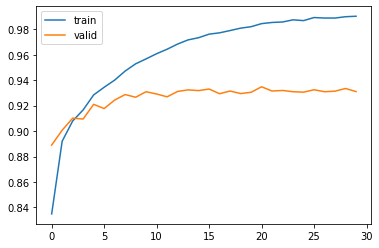

In [ ]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D

def create_model():
    input_tensor = Input(shape=(28, 28, 1))
    x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor)
    x = Conv2D(filters=64, kernel_size=3, activation='relu')(x)
    x = MaxPooling2D(2)(x)

    #x = Dropout(rate=0.5)(x)
    x = Flatten()(x)
    x = Dropout(rate=0.5)(x)
    x = Dense(200, activation='relu')(x)
    X = Dropout(rate=0.2)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

model = create_model()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_1 (Dropout)         (None, 10816)             0         
                                                           

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Epoch 1/30
399/399 [==============================] - 161s 403ms/step - loss: 0.4499 - accuracy: 0.8391 - val_loss: 0.3176 - val_accuracy: 0.8849
Epoch 2/30
399/399 [==============================] - 159s 399ms/step - loss: 0.2895 - accuracy: 0.8952 - val_loss: 0.2712 - val_accuracy: 0.9016
Epoch 3/30
399/399 [==============================] - 157s 395ms/step - loss: 0.2426 - accuracy: 0.9100 - val_loss: 0.2393 - val_accuracy: 0.9106
Epoch 4/30
399/399 [==============================] - 158s 397ms/step - loss: 0.2102 - accuracy: 0.9226 - val_loss: 0.2188 - val_accuracy: 0.9188
Epoch 5/30
399/399 [==============================] - 158s 396ms/step - loss: 0.1853 - accuracy: 0.9305 - val_loss: 0.2212 - val_accuracy: 0.9184
Epoch 6/30
399/399 [==============================] - 157s 393ms/step - loss: 0.1619 - accuracy: 0.9400 - val_loss: 0.2106 - val_accuracy: 0.9247
Epoch 7/30
399/399 [==============================] - 159s 397ms/step - loss: 0.1425 - accuracy: 0.9465 - val_loss: 0.2134 -

40/40 [==============================] - 7s 166ms/step - loss: 0.3906 - accuracy: 0.9287


[0.39058277010917664, 0.9286999702453613]

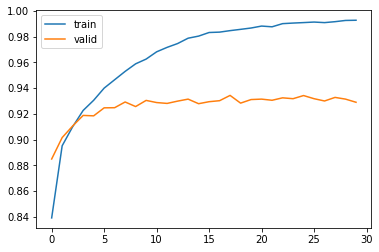

In [ ]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print('before reshape:', train_images.shape, test_images.shape)
train_images = np.reshape(train_images, (60000, 28, 28, 1))
test_images = np.reshape(test_images, (10000, 28, 28, 1))
print('after reshape:', train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

before reshape: (60000, 28, 28) (10000, 28, 28)
after reshape: (60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)
(51000, 28, 28, 1) (51000, 10) (9000, 28, 28, 1) (9000, 10) (10000, 28, 28, 1) (10000, 10)


In [ ]:
from tensorflow.keras.optimizers import Adam

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels))

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dropout_3 (Dropout)         (None, 10816)             0         
                                                           

40/40 [==============================] - 12s 304ms/step - loss: 0.3950 - accuracy: 0.9296


[0.3950245976448059, 0.9296000003814697]

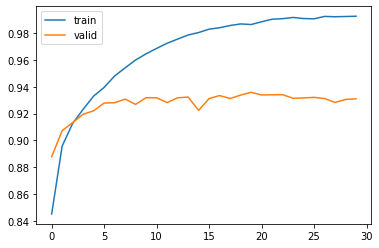

In [ ]:
show_history(history)
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)